In [47]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
# % matplotlib inline
import ast



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [2]:
def compare_results_with_groundtruth(y_true, y_pred, Model_name):
    print("Prediction Model :", Model_name),
    print("Classification Report :"),
    print(metrics.classification_report(y_true, y_pred))
    print("Accuracy Score :", metrics.accuracy_score(y_true, y_pred))
    print("Confusion Matrix :")
    cnf_mat = metrics.confusion_matrix(y_true, y_pred)
    metrics.ConfusionMatrixDisplay(cnf_mat, display_labels=set(y_true)).plot()

In [3]:
portfolio = pd.read_csv("./portfolio.csv")

profile = pd.read_csv("./profile.csv")

transcript = pd.read_csv("./transcript.csv")

In [4]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


In [5]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


In [6]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


In [7]:
portfolio.describe()

,Unnamed: 0,reward,difficulty,duration
count,10.00000,10.000000,10.000000,10.000000
mean,4.50000,4.200000,7.700000,6.500000
std,3.02765,3.583915,5.831905,2.321398
min,0.00000,0.000000,0.000000,3.000000
25%,2.25000,2.000000,5.000000,5.000000
50%,4.50000,4.000000,8.500000,7.000000
75%,6.75000,5.000000,10.000000,7.000000
max,9.00000,10.000000,20.000000,10.000000


In [8]:
profile.describe()

,Unnamed: 0,age,became_member_on,income
count,17000.000000,17000.000000,1.700000e+04,14825.000000
mean,8499.500000,62.531412,2.016703e+07,65404.991568
std,4907.621624,26.738580,1.167750e+04,21598.299410
min,0.000000,18.000000,2.013073e+07,30000.000000
25%,4249.750000,45.000000,2.016053e+07,49000.000000
50%,8499.500000,58.000000,2.017080e+07,64000.000000
75%,12749.250000,73.000000,2.017123e+07,80000.000000
max,16999.000000,118.000000,2.018073e+07,120000.000000


In [9]:
transcript.describe()

,Unnamed: 0,time
count,306534.000000,306534.000000
mean,153266.500000,366.382940
std,88488.888045,200.326314
min,0.000000,0.000000
25%,76633.250000,186.000000
50%,153266.500000,408.000000
75%,229899.750000,528.000000
max,306533.000000,714.000000


In [10]:
profile.isna().sum()

Unnamed: 0             0
gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [11]:
portfolio.isna().sum()

Unnamed: 0    0
reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [12]:
transcript.isna().sum()

Unnamed: 0    0
person        0
event         0
value         0
time          0
dtype: int64

### Data Cleaning

In [13]:
#drop unnamed:0 column from all dataframes
profile.drop('Unnamed: 0', axis=1, inplace=True)
transcript.drop('Unnamed: 0', axis=1, inplace=True)
portfolio.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
profile.dropna(inplace=True)

In [15]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


### Exploratory data analysis

In [16]:
profile

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


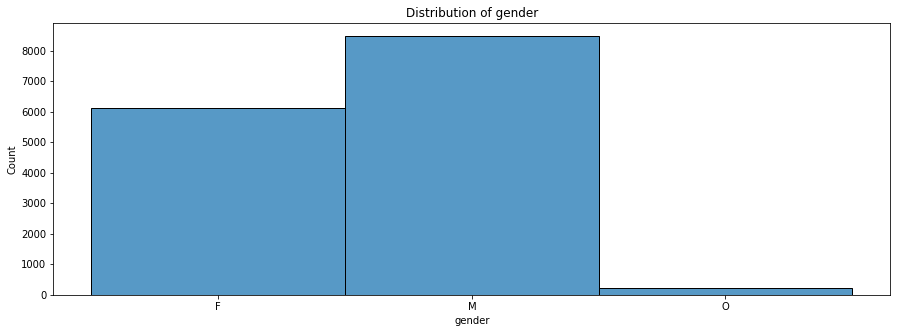

In [17]:
fig = plt.figure(figsize=(15,5))
sns.histplot(profile['gender'])
plt.title("Distribution of gender")
plt.show()

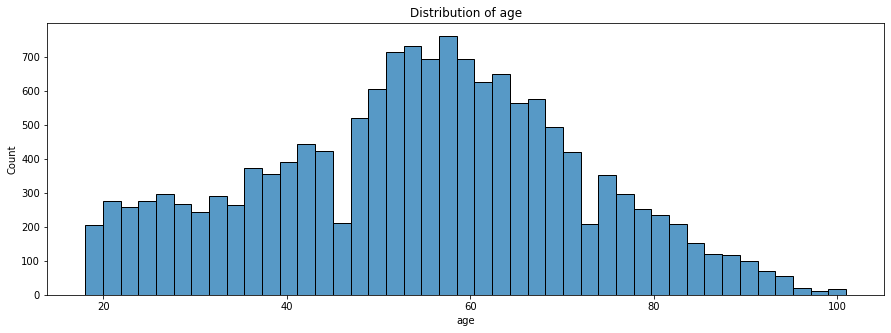

In [18]:
fig = plt.figure(figsize=(15,5))
sns.histplot(profile['age'])
plt.title("Distribution of age")
plt.show()

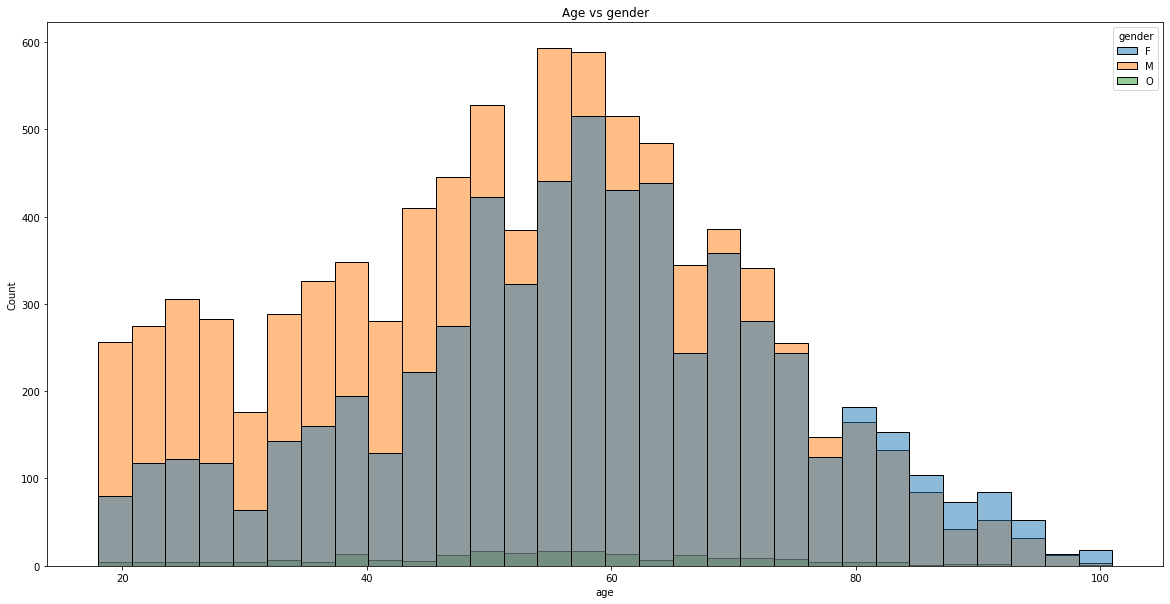

In [19]:
fig = plt.figure(figsize=(20,10))
sns.histplot(profile, x='age', hue='gender', bins=30)
plt.title('Age vs gender')
plt.show()

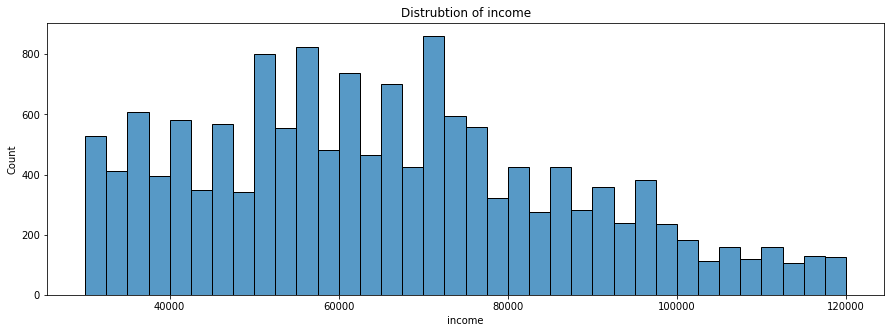

In [20]:
fig = plt.figure(figsize=(15,5))
sns.histplot(profile['income'])
plt.title("Distrubtion of income")
plt.show()

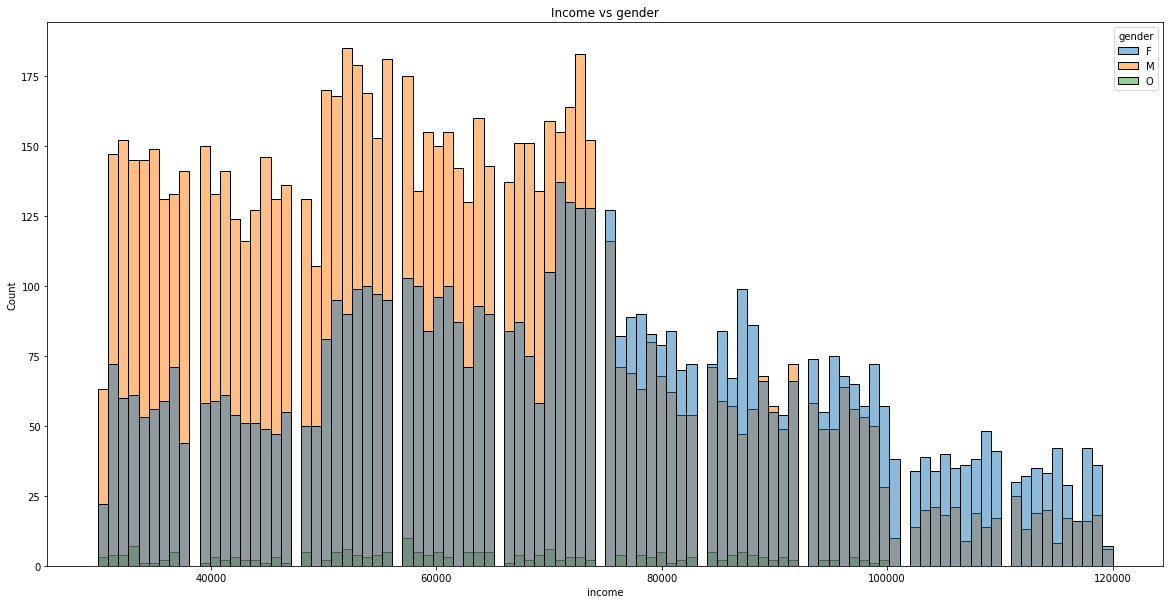

In [21]:
fig = plt.figure(figsize=(20,10))
sns.histplot(profile, x='income', hue='gender', bins=100)
plt.title('Income vs gender')
plt.show()

In [22]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

In [23]:
profile['year'] = profile['became_member_on'].apply(lambda x : x.year)
profile['month'] = profile['became_member_on'].apply(lambda x : x.month)
profile['day'] = profile['became_member_on'].apply(lambda x : x.day)
profile['quarter'] = profile['became_member_on'].apply(lambda x : x.quarter)
profile['day_name'] = profile['became_member_on'].apply(lambda x : x.day_name())

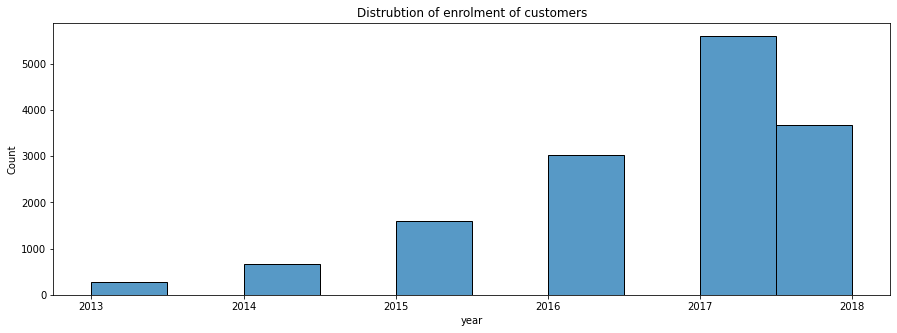

In [24]:
fig = plt.figure(figsize=(15,5))
sns.histplot(profile['year'], bins=10)
plt.title("Distrubtion of enrolment of customers")
plt.show()

Although the no of custumers who enrolled into the membership increased, we could see that it decreased in 2018 clearly

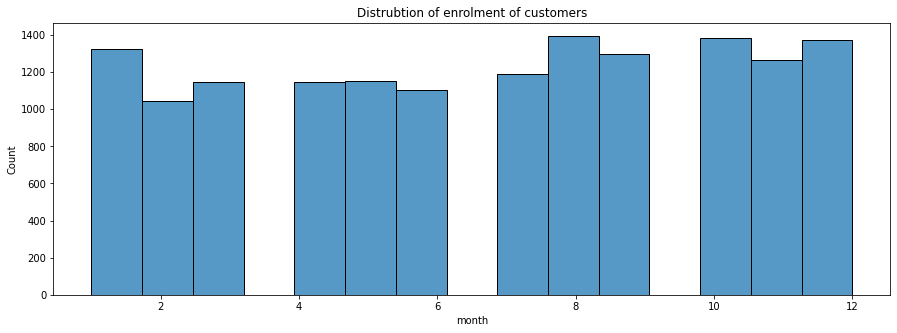

In [25]:
fig = plt.figure(figsize=(15,5))
sns.histplot(profile['month'], bins=15)
plt.title("Distrubtion of enrolment of customers")
plt.show()

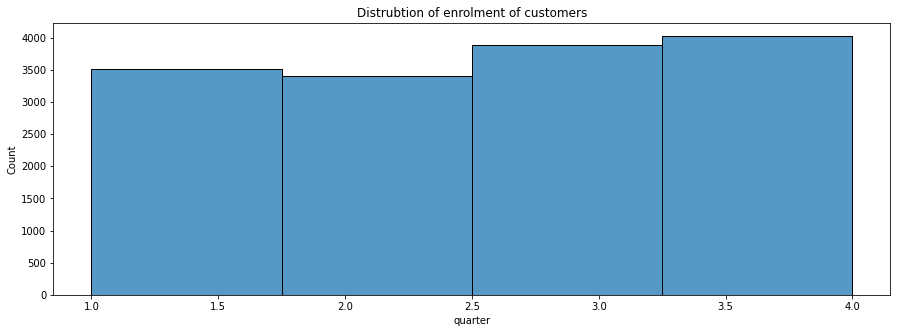

In [26]:
fig = plt.figure(figsize=(15,5))
sns.histplot(profile['quarter'], bins=4)
plt.title("Distrubtion of enrolment of customers")
plt.show()

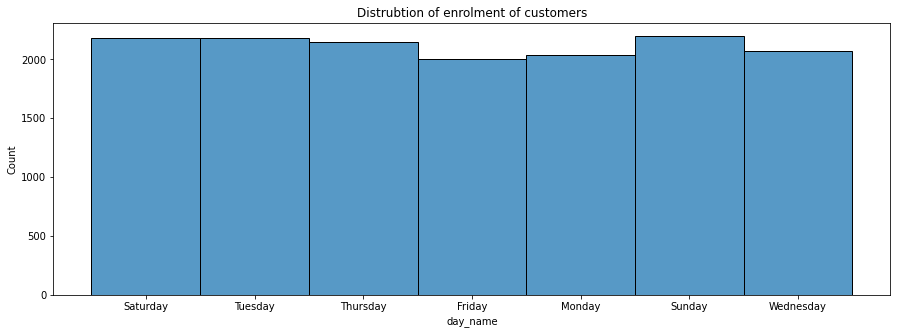

In [27]:
fig = plt.figure(figsize=(15,5))
sns.histplot(profile['day_name'], bins=10)
plt.title("Distrubtion of enrolment of customers")
plt.show()

In [28]:
def substitute(value):
    
    some = [x for x in list(value.keys()) if "offer" in x]
    
    if len(some) != 0:
        return value[some[0]]
    else:
        return np.nan

In [29]:
transcript['value'] = transcript['value'].apply(lambda x :ast.literal_eval(x))

transcript['offer_id_used'] = transcript['value'].apply(lambda x : substitute(value=x)) 
transcript['amount_spend'] = transcript['value'].apply(lambda x : x['amount'] if "amount" in x else np.nan)

transcript.drop('value', inplace=True, axis = 1)

In [30]:
transcript.rename(columns={'person':'id'}, inplace=True)

In [31]:
df = profile.merge(transcript, on="id", how = "inner")

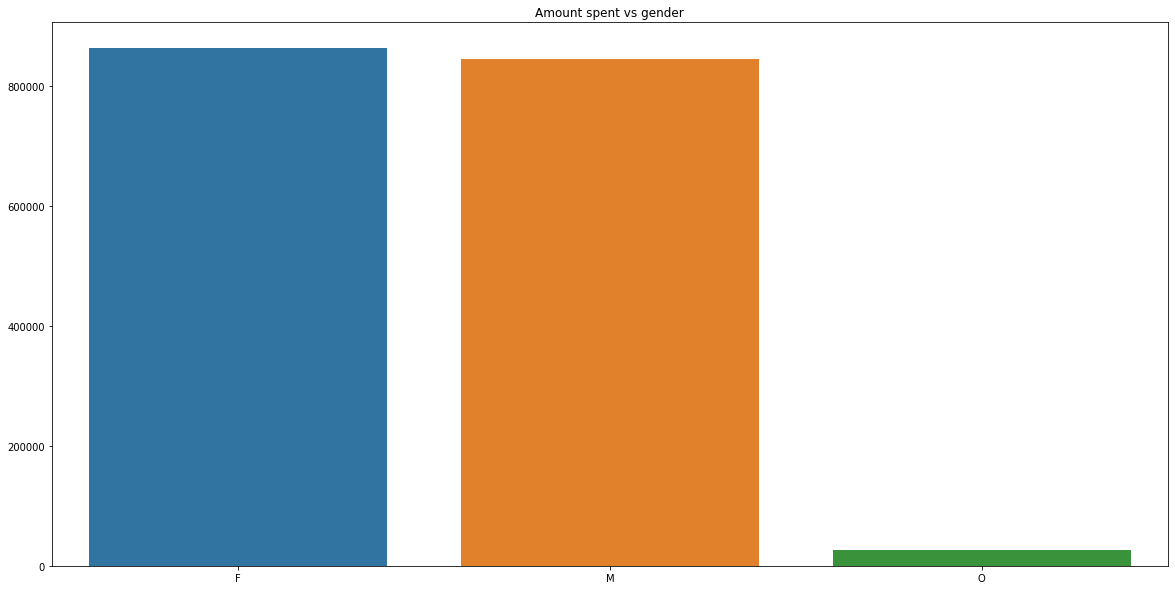

In [32]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x= ['F','M','O'], y=df.groupby('gender').sum().amount_spend.values)
plt.title('Amount spent vs gender')
plt.show()

Text(0.5, 1.0, 'Total transactions per year per gender')

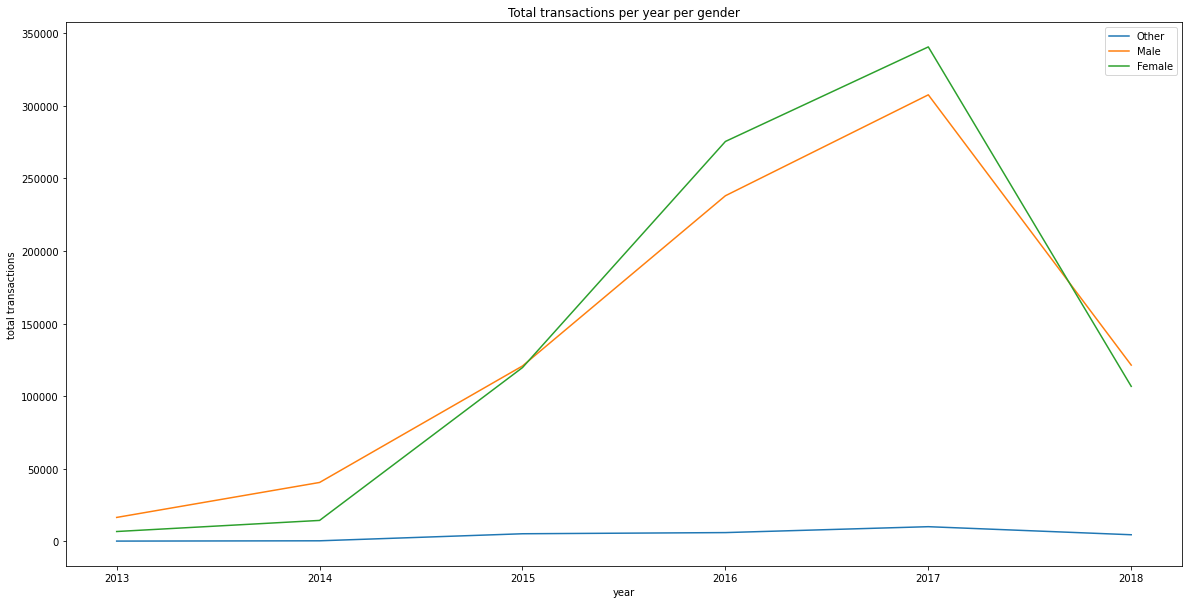

In [33]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(x=df.groupby(['gender','year']).sum().amount_spend.loc['O'].index, 
             y=df.groupby(['gender','year']).sum().amount_spend.loc['O'].values , label='Other')
sns.lineplot(x=df.groupby(['gender','year']).sum().amount_spend.loc['M'].index, 
             y=df.groupby(['gender','year']).sum().amount_spend.loc['M'].values , label='Male')
sns.lineplot(x=df.groupby(['gender','year']).sum().amount_spend.loc['F'].index, 
             y=df.groupby(['gender','year']).sum().amount_spend.loc['F'].values , label='Female')
plt.ylabel('total transactions')
plt.title('Total transactions per year per gender')

In [34]:
portfolio.rename(columns={"id": "offer_id_used"}, inplace=True)

In [35]:
df = df.merge(portfolio, on = "offer_id_used", how="inner")

In [36]:
df=pd.concat([df, pd.get_dummies(df['event'])], axis=1)

In [37]:
df = pd.concat([df, pd.get_dummies(df['gender'])], axis = 1)
df = pd.concat([df, pd.get_dummies(df['offer_type'])], axis = 1)

In [38]:
main_list = []

for x in df['channels']:
    main_list.extend(ast.literal_eval(x))
    
main_list = list(set(main_list))

for channel_name in main_list:
    
    df[channel_name] = df['channels'].apply(lambda x : 1 if channel_name in x else 0)

In [39]:
df.columns

Index(['gender', 'age', 'id', 'became_member_on', 'income', 'year', 'month',
       'day', 'quarter', 'day_name', 'event', 'time', 'offer_id_used',
       'amount_spend', 'reward', 'channels', 'difficulty', 'duration',
       'offer_type', 'offer completed', 'offer received', 'offer viewed', 'F',
       'M', 'O', 'bogo', 'discount', 'informational', 'social', 'web', 'email',
       'mobile'],
      dtype='object')

In [40]:
df.drop(['gender', "became_member_on", "day_name", "event", "offer_type", "id", "offer_id_used", "channels", "amount_spend"], inplace=True, axis = 1)

In [41]:
X = df.drop("offer completed", axis=1)
Y = df['offer completed']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=101, train_size=0.3)

Prediction Model : Logistic Regression
Classification Report :
              precision    recall  f1-score   support

           0       0.78      0.99      0.88     81381
           1       0.48      0.03      0.05     22783

    accuracy                           0.78    104164
   macro avg       0.63      0.51      0.46    104164
weighted avg       0.72      0.78      0.70    104164

Accuracy Score : 0.7807975884182635
Confusion Matrix :


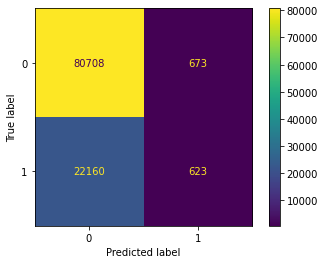

In [46]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
Y_test_pred_LR = LR.predict(X_test)
compare_results_with_groundtruth(y_true=Y_test, y_pred=Y_test_pred_LR, Model_name="Logistic Regression")

Prediction Model : Random forest
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81381
           1       1.00      1.00      1.00     22783

    accuracy                           1.00    104164
   macro avg       1.00      1.00      1.00    104164
weighted avg       1.00      1.00      1.00    104164

Accuracy Score : 1.0
Confusion Matrix :


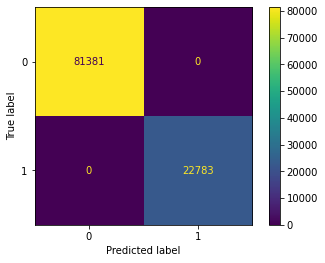

In [48]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
Y_test_pred_RF = RF.predict(X_test)
compare_results_with_groundtruth(y_true=Y_test, y_pred=Y_test_pred_RF, Model_name="Random forest")